In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn import metrics
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
import time

import warnings 
warnings.filterwarnings("ignore")

In [109]:
path = "/Users/tanvik/Downloads/Chocolate (1) (1).csv"

In [110]:
df = pd.read_csv(path)

In [111]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,Multiple Pieces,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0.0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0.0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0.0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0.0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0.0,0.906,0.511,52.341465


In [112]:
Num = [features for features in df.columns if df[features].dtypes != 'O'] 

Cat = [features for features in df.columns if df[features].dtypes == 'O']

print('Numerical Variables - ')
print(Num)
print('Categorical Variable - ')
print(Cat)

Numerical Variables - 
['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'Multiple Pieces', 'sugarpercent', 'pricepercent', 'winpercent']
Categorical Variable - 
['competitorname']


In [122]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chocolate         85 non-null     int64  
 1   fruity            85 non-null     int64  
 2   caramel           85 non-null     int64  
 3   peanutyalmondy    85 non-null     int64  
 4   nougat            85 non-null     int64  
 5   crispedricewafer  85 non-null     int64  
 6   hard              85 non-null     int64  
 7   bar               85 non-null     int64  
 8   Multiple Pieces   61 non-null     float64
 9   sugarpercent      85 non-null     float64
 10  pricepercent      85 non-null     float64
dtypes: float64(3), int64(8)
memory usage: 7.4 KB


In [113]:
df.isna().sum()

competitorname       0
chocolate            0
fruity               0
caramel              0
peanutyalmondy       0
nougat               0
crispedricewafer     0
hard                 0
bar                  0
Multiple Pieces     24
sugarpercent         0
pricepercent         3
winpercent           0
dtype: int64

In [115]:
df[(df['chocolate'] == 1)].head(20)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,Multiple Pieces,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0.0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0.0,0.604,0.511,67.602936
5,Almond Joy,1,0,0,1,0,0,0,1,0.0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,NaN,0.604,0.767,56.914547
10,Charleston Chew,1,0,0,0,1,0,0,1,NaN,0.604,0.511,38.975037
22,HersheyÕs Kisses,1,0,0,0,0,0,0,0,1.0,0.127,0.093,55.375454
23,HersheyÕs Krackel,1,0,0,0,0,1,0,1,0.0,0.430,NaN,62.284481
24,HersheyÕs Milk Chocolate,1,0,0,0,0,0,0,1,0.0,0.430,0.918,56.490501
25,HersheyÕs Special Dark,1,0,0,0,0,0,0,1,0.0,0.430,0.918,59.236122
27,Junior Mints,1,0,0,0,0,0,0,0,1.0,0.197,0.511,57.219250


In [114]:
df[df['pricepercent'].isnull()]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,Multiple Pieces,sugarpercent,pricepercent,winpercent
7,Boston Baked Beans,0,0,0,1,0,0,0,0,NaN,0.313,NaN,23.417824
23,HersheyÕs Krackel,1,0,0,0,0,1,0,1,0.0,0.430,NaN,62.284481
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1.0,0.069,NaN,52.825947


In [117]:
print(df['pricepercent'][(df['chocolate']== 1)].mean())
print(df['pricepercent'][(df['chocolate']== 0)].mean())

0.6242222261666668
0.3443043447826088


In [177]:
df['pricepercent'][7] = 0.344
df['pricepercent'][23] = 0.624
df['pricepercent'][67] = 0.344

In [120]:
df_copy=df.drop(columns=['competitorname','winpercent'],axis=1)

In [121]:
df_copy

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,Multiple Pieces,sugarpercent,pricepercent
0,1,0,1,0,0,1,0,1,0.0,0.732,0.860
1,1,0,0,0,1,0,0,1,0.0,0.604,0.511
2,0,0,0,0,0,0,0,0,0.0,0.011,0.116
3,0,0,0,0,0,0,0,0,0.0,0.011,0.511
4,0,1,0,0,0,0,0,0,0.0,0.906,0.511
...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0.0,0.220,0.116
81,0,1,0,0,0,0,1,0,0.0,0.093,0.116
82,0,1,0,0,0,0,0,0,1.0,0.313,0.313
83,0,0,1,0,0,0,1,0,0.0,0.186,0.267


In [123]:
imputer = KNNImputer(n_neighbors=4)
df_filled=imputer.fit_transform(df_copy[['chocolate','Multiple Pieces']])

In [128]:
df_filled.head()

,Chocolate1,Missing
0,1.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [129]:
df_filled = pd.DataFrame(df_filled, columns = ['Chocolate1','Missing'])

In [132]:
df_filled.value_counts()

Chocolate1  Missing
0.0         1.00       36
1.0         0.00       20
0.0         0.00       12
1.0         0.25       10
            1.00        7
dtype: int64

In [133]:
df_filled = df_filled.astype(int)

In [134]:
df_filled

,Chocolate1,Missing
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
80,0,0
81,0,0
82,0,1
83,0,0


In [135]:
df_copy = df_copy.join(df_filled)

In [136]:
df_copy['Missing'].value_counts()

1    43
0    42
Name: Missing, dtype: int64

In [137]:
df['Multiple Pieces'].value_counts()

0.0    32
1.0    29
Name: Multiple Pieces, dtype: int64

In [138]:
df_copy.isnull().sum()

chocolate            0
fruity               0
caramel              0
peanutyalmondy       0
nougat               0
crispedricewafer     0
hard                 0
bar                  0
Multiple Pieces     24
sugarpercent         0
pricepercent         0
Chocolate1           0
Missing              0
dtype: int64

In [290]:
df_copy.reset_index(drop = True)
x=df_copy.drop(columns=['chocolate','Chocolate1','Multiple Pieces'],axis=1)
y=df_copy['chocolate']

In [291]:
x=x.rename(columns={"Missing": "Multiple Pieces"})

In [292]:
y.value_counts()

0    48
1    37
Name: chocolate, dtype: int64

In [293]:
x_cols=x.columns.to_list()

In [294]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [295]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x_train)
log_reg = sm.Logit(y_train, x_train).fit()
print(log_reg.summary())

         Current function value: 0.178314
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              chocolate   No. Observations:                   59
Model:                          Logit   Df Residuals:                       49
Method:                           MLE   Df Model:                            9
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                  0.7401
Time:                        02:03:41   Log-Likelihood:                -10.521
converged:                      False   LL-Null:                       -40.479
Covariance Type:            nonrobust   LLR p-value:                 1.390e-09
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
fruity             -27.9138   2.25e+05     -0.000      1.000    -4.4e+05     4.4e+05
caramel             -0.3035      1.429     -0.2

In [259]:
scale=StandardScaler()
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled=scale.transform(x_test)

In [260]:
x_train=pd.DataFrame(x_train_scaled,columns=x_cols)
x_test=pd.DataFrame(x_test_scaled,columns=x_cols)

In [261]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(59, 10)
(26, 10)
(59,)
(26,)


<AxesSubplot:>

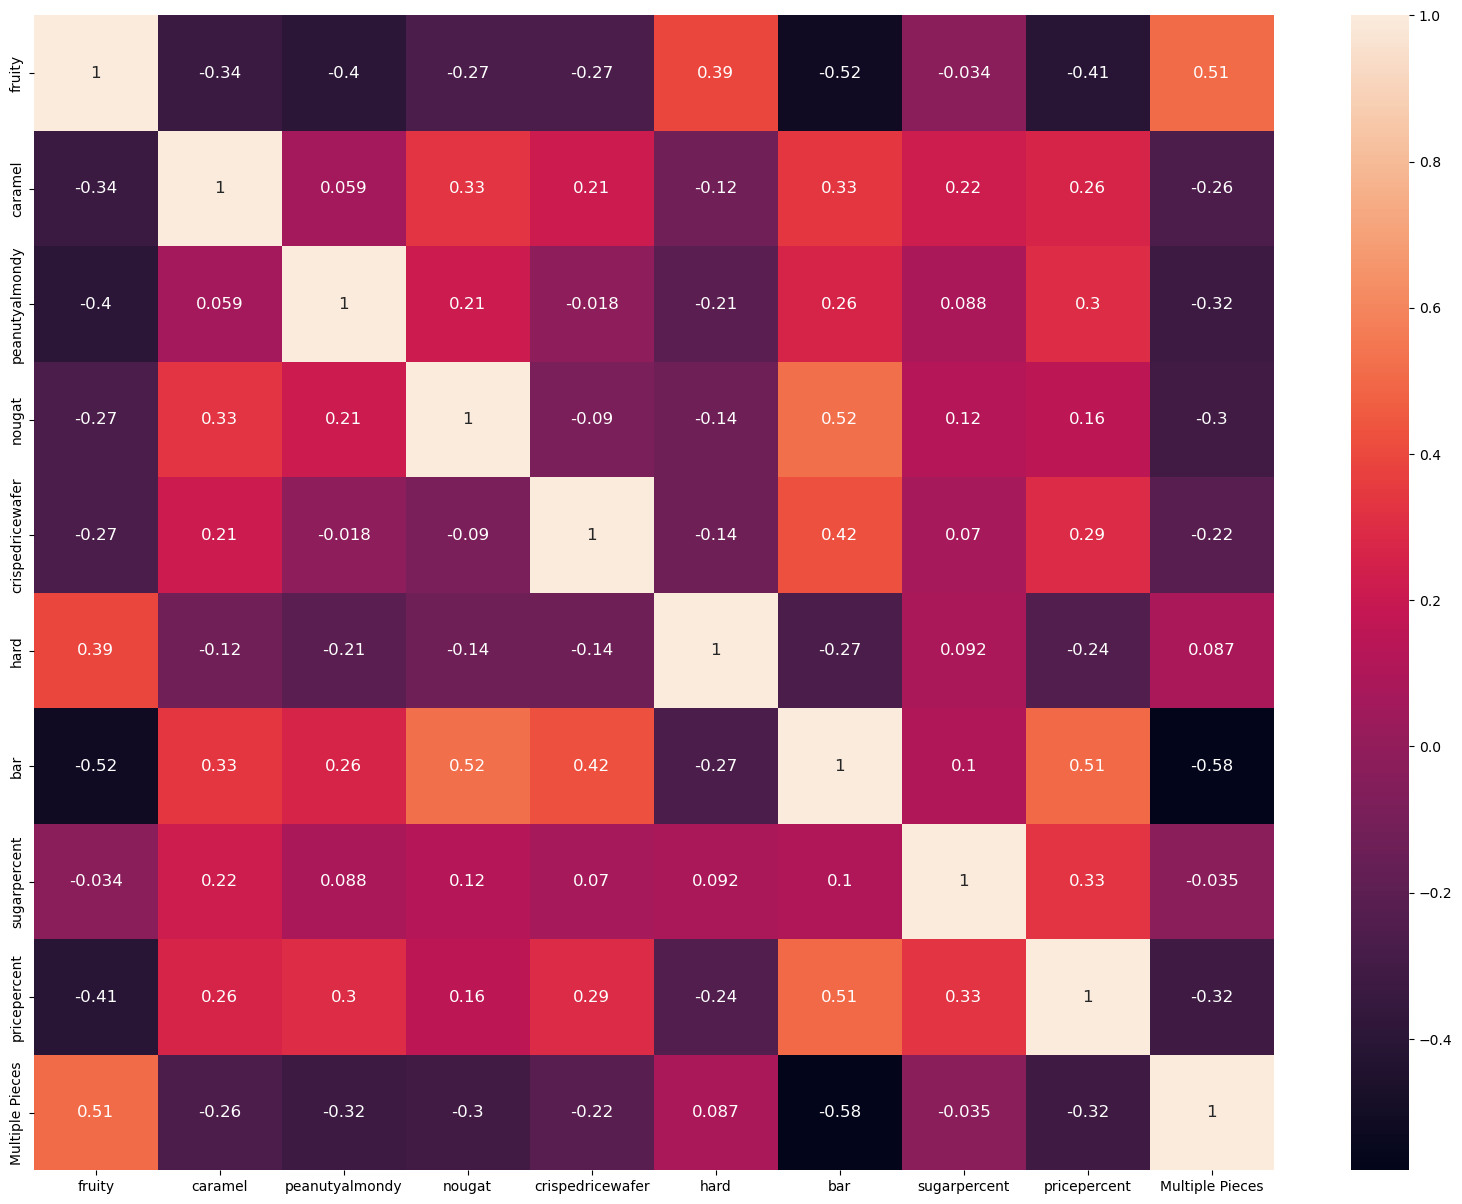

In [262]:
plt.figure(figsize = (20,15))
corr_matrix=x.corr()
sns.heatmap(corr_matrix,annot=True,annot_kws ={"size":12})

0    0.576271
1    0.423729
Name: chocolate, dtype: float64


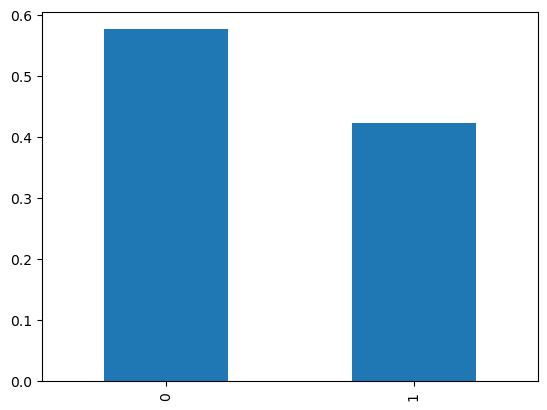

In [202]:
y_train.value_counts(normalize=True).plot(kind='bar')
print(y_train.value_counts(normalize=True))

In [315]:
log_model = LogisticRegression(max_iter=300)
start_time = time.time()
log_model.fit(x_train, y_train)
elapsed_time = time.time() - start_time
print("Training time:", elapsed_time)
start_time = time.time()
y_pred = log_model.predict(x_test)
elapsed_time = time.time() - start_time
print("Inference time:", elapsed_time)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy:{:.3f}\tF1_Score:{:.3f}'.format(acc,f1))
print('Recall score:{:.3f}\tPrecision_Score:{:.3f}'.format(recall,precision))

Training time: 0.006435871124267578
Inference time: 0.0011279582977294922
0.7692307692307693
[[13  2]
 [ 4  7]]
Accuracy:0.885	F1_Score:0.700
Recall score:0.636	Precision_Score:0.778


In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        14
           1       0.71      1.00      0.83        12

    accuracy                           0.81        26
   macro avg       0.85      0.82      0.81        26
weighted avg       0.86      0.81      0.80        26



In [173]:
score=roc_auc_score(y_test,y_pred)
score

0.8214285714285714

<function matplotlib.pyplot.show(close=None, block=None)>

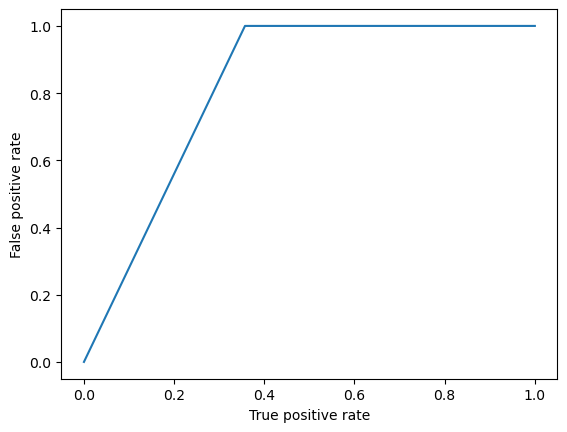

In [174]:
curve=roc_curve(y_test,y_pred)
fpr,tpr,_ = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel("True positive rate")
plt.ylabel('False positive rate')
plt.show

In [310]:
rf = RandomForestClassifier(n_estimators=1000, max_features='auto', random_state=143)
start_time = time.time()
rf = rf.fit(x_train,y_train)
elapsed_time = time.time() - start_time
print("Training time:", elapsed_time)

Training time: 0.6529443264007568


In [311]:
start_time = time.time()
y_pred = rf.predict(x_test)
y_pred = pd.DataFrame(y_pred)
elapsed_time = time.time() - start_time
print("Inference time:", elapsed_time)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy:{:.3f}\tF1_Score:{:.3f}'.format(acc,f1))
print('Recall score:{:.3f}\tPrecision_Score:{:.3f}'.format(recall,precision))

Inference time: 0.07086586952209473
0.8461538461538461
[[14  1]
 [ 3  8]]
Accuracy:0.885	F1_Score:0.800
Recall score:0.727	Precision_Score:0.889


In [302]:
print(classification_report(y_test, y_pred))
conf=confusion_matrix(y_test,y_pred)
print(conf)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.89      0.73      0.80        11

    accuracy                           0.85        26
   macro avg       0.86      0.83      0.84        26
weighted avg       0.85      0.85      0.84        26

[[14  1]
 [ 3  8]]


Text(0.5, 0, 'Random Forest Feature Importance')

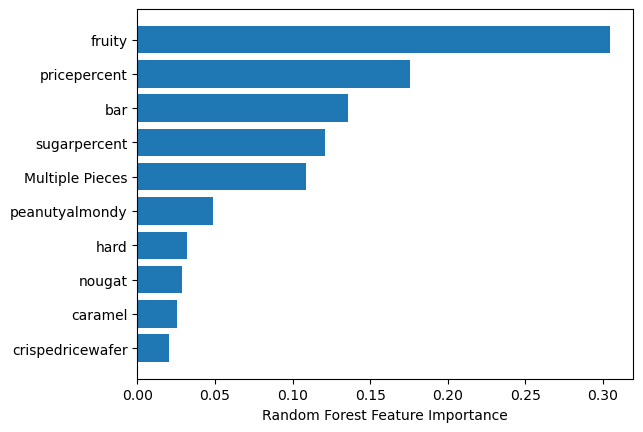

In [303]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [309]:
tree_model = DecisionTreeClassifier()
start_time = time.time()
tree_model = tree_model.fit(x_train,y_train)
elapsed_time = time.time() - start_time
print("Training time:", elapsed_time)
y_pred = tree_model.predict(x_test)
start_time = time.time()
y_pred = pd.DataFrame(y_pred)
elapsed_time = time.time() - start_time
print("Inference time:", elapsed_time)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy:{:.3f}\tF1_Score:{:.3f}'.format(acc,f1))
print('Recall score:{:.3f}\tPrecision_Score:{:.3f}'.format(recall,precision))

Training time: 0.01116800308227539
Inference time: 0.00026106834411621094
0.8461538461538461
[[15  0]
 [ 4  7]]
Accuracy:0.885	F1_Score:0.778
Recall score:0.636	Precision_Score:1.000


In [305]:
plt.figure(figsize=(20, 8), dpi=1000)
plot_tree(tree_model, filled=True, feature_names=x.columns,max_depth = 3);

In [312]:
xgb_model = XGBClassifier(n_estimators=1000,learning_rate=3e-2,random_state=143)
start_time = time.time()
xgb_model.fit(x_train,y_train)
elapsed_time = time.time() - start_time
print("Training time:", elapsed_time)
start_time = time.time()
xgb_pred = xgb_model.predict(x_test)
elapsed_time = time.time() - start_time
print("Inference time:", elapsed_time)
acc = accuracy_score(y_test,xgb_pred)
f1 = f1_score(y_test,xgb_pred)
recall = recall_score(y_test,xgb_pred)
precision = precision_score(y_test,xgb_pred)
print('Accuracy:{:.3f}\tF1_Score:{:.3f}'.format(acc,f1))
print('Recall score:{:.3f}\tPrecision_Score:{:.3f}'.format(recall,precision))
conf=confusion_matrix(y_test,xgb_pred)
print(conf)

Training time: 1.375129222869873
Inference time: 0.0018768310546875
Accuracy:0.885	F1_Score:0.842
Recall score:0.727	Precision_Score:1.000
[[15  0]
 [ 3  8]]


<AxesSubplot:>

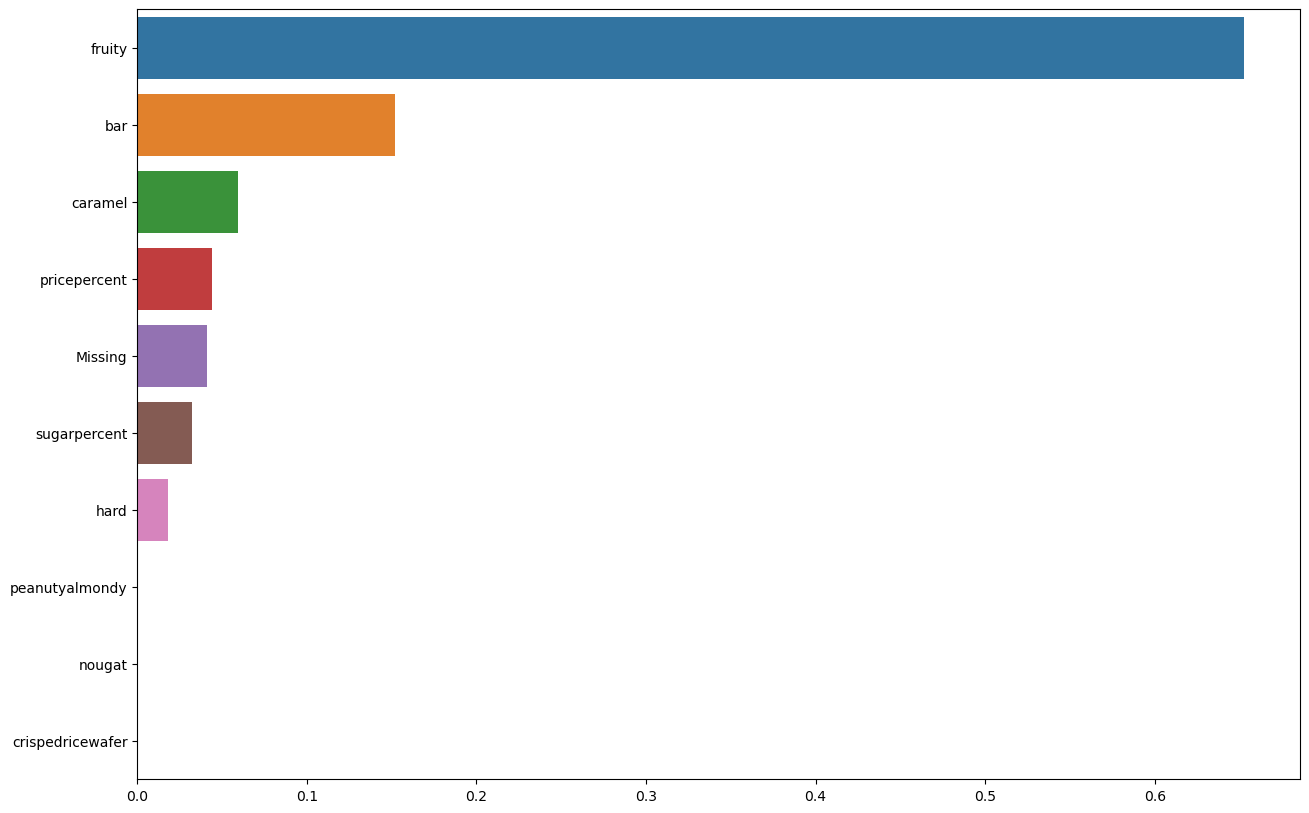

In [191]:
feature_important = pd.Series(xgb_model.feature_importances_,index=x_train.columns)
sort_ = feature_important.sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x=sort_,y=sort_.index)